![STScI Logo](../../../_static/stsci_header.png)

# Introduction to the HSLA Data Products and Tools

### <span style="font-weight:normal">This Notebook will walk you through the data products available from the **[Hubble Spectroscopic Legacy Archive (HSLA)](https://archive.stsci.edu/missions-and-data/hsla)** and show how to use the co-add script for custom applications.</span>

## Learning Goals: 

By the end of this tutorial, you will learn how to:

- Use `astroquery.mast` to download HSLA, COS and STIS data

- Examine the data (flux vs. wavelength), S/N ratio, and effective exposure time in an abutted spectral file

- Retrieve the spectra of an entire class of objects

- Change the choice of gratings for each wavelength by modifying the grating-priority file

- Run the co-add script

- Examine the co-added output

## Table of Contents

**0. [Introduction](#introduction)**

**1. [Retrieve and Examine HSLA products](#hsla_review)**

\- 1.1 [Use `astroquery` to Download HSLA Files](#hsla_download)

\- 1.2 [Examine the HSLA Files](#hsla_examine)

\- 1.3 [Plot the HSLA Files](#hsla_plot)

\- 1.4 [Examine the Provenance Table](#hsla_provenance)

**2. [Retrieve Targets by Class](#class)**

**3. [HSLA Custom Co-Adds](#customize)**

\- 3.1 [Retrieve the COS and STIS Data](#retrieve_data)

\- 3.2 [Run the Co-Add Script](#run_script)

**4. [Scaling Spectra for Special Cases](#scale_spectra)**

<a id = introduction></a>
## 0. Introduction

The [Hubble Advanced Spectral Products (HASP)](https://archive.stsci.edu/missions-and-data/hst/hasp) program provides co-added spectra within individual observing programs that use the [Space Telescope Imaging Spectrograph (STIS)](https://www.stsci.edu/hst/instrumentation/stis) and the [Cosmic Origins Spectrograph (COS)](https://www.stsci.edu/hst/instrumentation/cos) instruments onboard the [Hubble Space Telescope (HST)](https://www.stsci.edu/hst). The [Hubble Spectroscopic Legacy Archive (HSLA)](https://archive.stsci.edu/missions-and-data/hsla) goes one step farther, bringing together data from multiple observing programs to create spectra with the highest possible signal-to-noise and wavelength range (when possible, from the ultraviolet to the near-infrared).  In this notebook, we will retrieve the HSLA data for a single object and explore the various data files.  Then we will use the HSLA code to make a custom co-add, setting the selection criteria by hand.

***We recommend using the `micromamba` environment `stenv` when co-adding spectra. Please see our [Setup](https://github.com/spacetelescope/hst_notebooks/tree/main/notebooks/HASP/Setup) notebook to install this environment and download the co-add code.***

### Imports

We will be using multiple libraries to retrieve and analyze data: 
* `Path.pathlib` to create product and data directories 
* `astroquery.mast MastMissions` and `Observations` to download COS and STIS data
* `shutil` to perform directory and file operations
* `os` to interact with the operating system
* `astropy.io fits` to work with FITS files
* `astropy.table Table` to examine the provenance table
* `matplotlib.pyplot` to plot various arrays
* `glob` to work with multiple files in our directories
* `numpy` to help analyze our data

Import all of the packages that we will use in this notebook by running the next cell:

In [1]:
import os
from pathlib import Path
from astroquery.mast import Observations
import shutil
import glob as glob
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

<a id = hsla_review></a>
## 1. Retrieve and Examine HSLA products

We begin by examining the HSLA products for the white-dwarf star Feige 22.  It has been observed with both COS and STIS, but not so many times that downloading the data will be a chore.  

<a id = hsla_download></a>
### 1.1 Use `astroquery` to Download HSLA Files

We set up our directory structure, then query the MAST database for the HSLA products for the star.  Note that we use the Observations module to conduct the search.  It has the advantage of allowing one to search for and retrieve the HSLA products directly.  Its disadvantages are that the search criteria are somewhat limited and queries can be slow, since it searches a database containing all of the MAST-supported missions.

In [2]:
# Define the directory
output = Path('./hsla_default_products')

In [3]:
# Conduct the query
obs = Observations.get_product_list(
    Observations.query_criteria(
        provenance_name='HSLA',
        target_name='Feige 22'
    )
)

In [4]:
# Fetch the products
Observations.download_products(
    obs,
    download_dir=str(output)
)

Local Path,Status,Message,URL
str105,str8,object,object
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_cos_feige22--3678_g130m-lp05_trl.txt,COMPLETE,None,None
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_cos_feige22--3678_g130m_lp05_trl.txt,COMPLETE,None,None
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_stis_feige22--3678_e230h_trl.txt,COMPLETE,None,None
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_stis_feige22--3678_g430l_trl.txt,COMPLETE,None,None
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_stis_feige22--3678_g750l_trl.txt,COMPLETE,None,None
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_stis_feige22--3678_sg140l_trl.txt,COMPLETE,None,None
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_stis_feige22--3678_sg230l_trl.txt,COMPLETE,None,None
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_feige22--3678_metadata.txt,COMPLETE,None,None
hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_cos_feige22--3678_g130m-lp05_cspec.png,COMPLETE,None,None


<a id = hsla_examine></a>
### 1.2. Examine the HSLA Files

The HSLA files are stored several levels down in the `hsla_default_products` directory.

In [5]:
! ls -1 hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678

hst_cos_feige22--3678_g130m_lp05_cspec.fits
hst_cos_feige22--3678_g130m_lp05_cspec.png
hst_cos_feige22--3678_g130m_lp05_trl.txt
hst_cos_feige22--3678_g130m-lp05_cspec.fits
hst_cos_feige22--3678_g130m-lp05_cspec.png
hst_cos_feige22--3678_g130m-lp05_trl.txt
hst_feige22--3678_aspec.fits
hst_feige22--3678_aspec.png
hst_feige22--3678_metadata.txt
hst_stis_feige22--3678_e230h_cspec.fits
hst_stis_feige22--3678_e230h_cspec.png
hst_stis_feige22--3678_e230h_trl.txt
hst_stis_feige22--3678_g430l_cspec.fits
hst_stis_feige22--3678_g430l_cspec.png
hst_stis_feige22--3678_g430l_trl.txt
hst_stis_feige22--3678_g750l_cspec.fits
hst_stis_feige22--3678_g750l_cspec.png
hst_stis_feige22--3678_g750l_trl.txt
hst_stis_feige22--3678_sg140l_cspec.fits
hst_stis_feige22--3678_sg140l_cspec.png
hst_stis_feige22--3678_sg140l_trl.txt
hst_stis_feige22--3678_sg230l_cspec.fits
hst_stis_feige22--3678_sg230l_cspec.png
hst_stis_feige22--3678_sg230l_trl.txt


Consider first the HSLA output product, the abutted or "aspec" file, which spans the full range of available wavelengths.  It is made by splicing together, or abutting, segments taken from the various gratings on both COS and STIS.  The FITS version contains the data; we will examine it in more detail shortly.  The PNG version is a quick-look image.

The "cspec" files contain the co-added spectra for various combinations of instrument, grating, and (for COS) lifetime position.  Note that these files combine spectra taken at all available central wavelengths. Ignore any COS files labeled "lp0." Those are calibration observations and are not included in the final spectrum.

The metadata file contains information compiled by the HSLA target-classification routine.  

In [6]:
! cat hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678/hst_feige22--3678_metadata.txt

TARGNAME: Feige 22
HSLA_CAT: feige22--3678
RA (2000): 2 30 16.63
DEC (2000): 5 15 50.70
SIMBAD: Feige 22
NED: 2MASS J02301662+0515508
PHASE II: WD0227+050; WDJ023016.63+051550.70
PHASE II KEYWORDS: DA; STAR
PRIMARY CLASSIFICATION: Star
SECONDARY CLASSIFICATION: Stellar remnant
TERTIARY CLASSIFICATION: White dwarf
CLASSIFICATION SOURCE: SIMBAD
UAT EQUIVALENT: White dwarf stars (1799)
RADIAL VELOCITY: 16.5 km / s
PROPOSAL IDS: 13332; 16249; 17420

SUMMARY
------
INSTRUMENT GRATING COS LP  MINWAVE  MAXWAVE
       COS   G130M    LP5     1130     1429
      STIS   G140L    ---     1140     1730
      STIS   G230L    ---     1568     3184
      STIS   E230H    ---     2574     2846
      STIS   G430L    ---     2900     5700
      STIS   G750L    ---     5236    10266


<a id = hsla_plot></a>
### 1.3 Plot the HSLA Files

Let's take a look at the abutted spectrum for this star.

In [7]:
hsla_path = "hsla_default_products/mastDownload/HST/hst_hsla_feige22--3678"
hsla_aspec_filename = "hst_feige22--3678_aspec.fits"

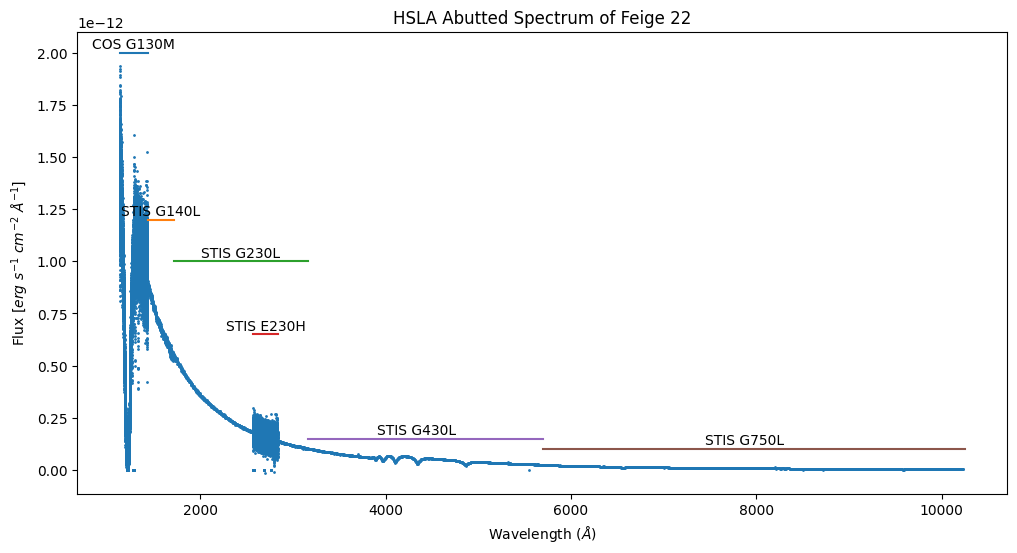

In [8]:
with fits.open(f"{hsla_path}/{hsla_aspec_filename}") as hdul:
    # Read the data file
    hsla_data = hdul[1].data
    provenance = Table.read(hdul[2])       # We'll examine the provenance table shortly.

    # Get the wavelength and flux arrays
    hsla_wave = hsla_data["WAVELENGTH"]
    hsla_flux = hsla_data["FLUX"]

    plt.figure(figsize=(12, 6))

    # Plot the spectrum
    plt.scatter(hsla_wave, hsla_flux,
                # Setting the size of the data points
                s=1)
    
    # Which grating provided each part of the spectrum?
    plt.plot([1130, 1435], [2.0E-12, 2.0E-12])
    plt.plot([1435, 1716], [1.2E-12, 1.2E-12])
    plt.plot([1716, 3159], [1.0E-12, 1.0E-12])
    plt.plot([2570, 2845], [6.5E-13, 6.5E-13])
    plt.plot([3159, 5700], [1.5E-13, 1.5E-13])
    plt.plot([5700, 10252], [1.0E-13, 1.0E-13])
    plt.text(1280, 2.02E-12, 'COS G130M', horizontalalignment='center')
    plt.text(1573, 1.22E-12, 'STIS G140L', horizontalalignment='center')
    plt.text(2437, 1.02E-12, 'STIS G230L', horizontalalignment='center')
    plt.text(2708, 6.70E-13, 'STIS E230H', horizontalalignment='center')
    plt.text(4330, 1.70E-13, 'STIS G430L', horizontalalignment='center')
    plt.text(7876, 1.20E-13, 'STIS G750L', horizontalalignment='center')

    # Format the plot by adding titles
    plt.title("HSLA Abutted Spectrum of Feige 22")
    plt.xlabel(r'Wavelength ($\AA$)')
    plt.ylabel(r'Flux [$erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')

    # Display the plot
    plt.show()

We have labeled the regions contributed by each of the COS and STIS gratings.  The STIS G230L spectrum spans the region 1716 to 3159 A, except for the region 2570 to 2845 A, where the STIS G230H spectrum is used, because it provides higher spectral resolution.  The low-resolution spectra have higher S/N ratios, reflecting their larger pixels.  We can explore this in more detail by plotting the S/N ratio directly.

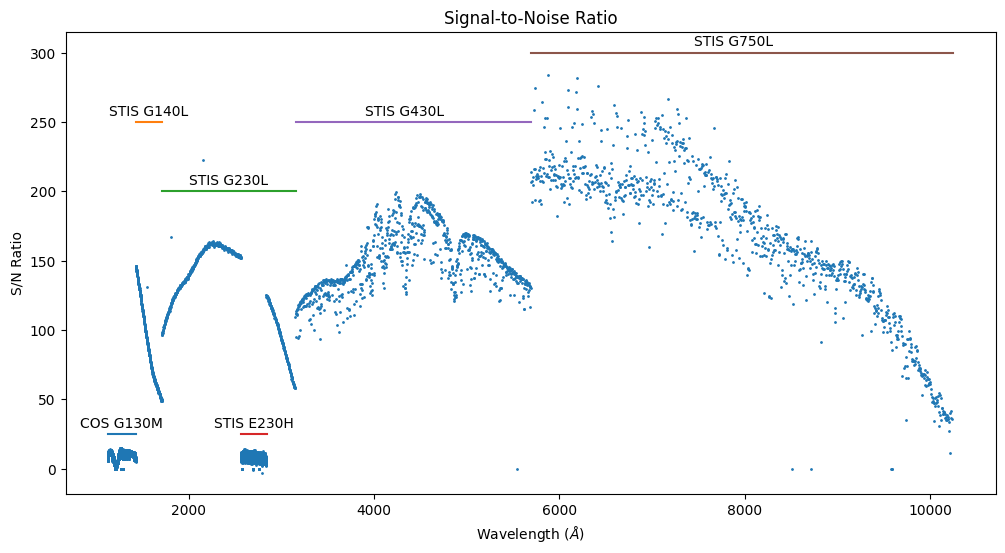

In [9]:
# Read the S/N array
hsla_snr = hsla_data["SNR"]

plt.figure(figsize=(12, 6)) 

# Plot the spectra
plt.scatter(hsla_wave, hsla_snr, s=1)
            
# Which grating provided each part of the spectrum?
plt.plot([1130, 1435], [25, 25])
plt.plot([1435, 1716], [250, 250])
plt.plot([1716, 3159], [200, 200])
plt.plot([2570, 2845], [25, 25])
plt.plot([3159, 5700], [250, 250])
plt.plot([5700, 10252], [300, 300])
plt.text(1280, 30, 'COS G130M', horizontalalignment='center')
plt.text(1573, 255, 'STIS G140L', horizontalalignment='center')
plt.text(2437, 205, 'STIS G230L', horizontalalignment='center')
plt.text(2708, 30, 'STIS E230H', horizontalalignment='center')
plt.text(4330, 255, 'STIS G430L', horizontalalignment='center')
plt.text(7876, 305, 'STIS G750L', horizontalalignment='center')

# Format the plot by adding titles
plt.title("Signal-to-Noise Ratio")
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'S/N Ratio')
plt.show()

Note that the tabulated S/N ratio is per pixel, not per resolution element -- and the pixel size varies with wavelength.

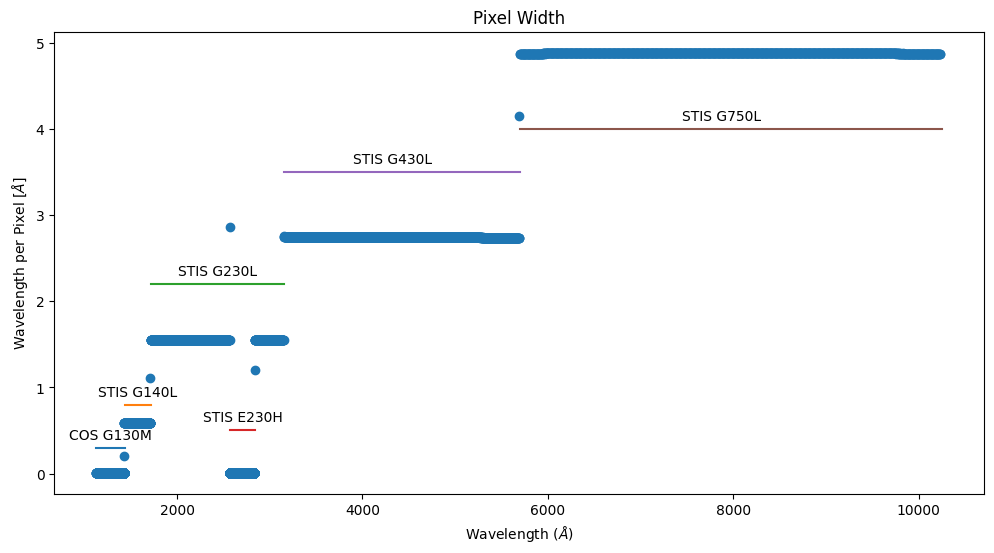

In [10]:
# Compute width of each pixel in wavelength.
dw = hsla_wave - np.roll(hsla_wave, 1)
dw[0, 0] = dw[0, 1]

plt.figure(figsize=(12, 6))
plt.scatter(hsla_wave, dw)

# Which grating provided each part of the spectrum?
plt.plot([1130, 1435], [0.3, 0.3])
plt.plot([1435, 1716], [0.8, 0.8])
plt.plot([1716, 3159], [2.2, 2.2])
plt.plot([2570, 2845], [0.5, 0.5])
plt.plot([3159, 5700], [3.5, 3.5])
plt.plot([5700, 10252], [4.0, 4.0])
plt.text(1280, 0.4, 'COS G130M', horizontalalignment='center')
plt.text(1573, 0.9, 'STIS G140L', horizontalalignment='center')
plt.text(2437, 2.3, 'STIS G230L', horizontalalignment='center')
plt.text(2708, 0.6, 'STIS E230H', horizontalalignment='center')
plt.text(4330, 3.6, 'STIS G430L', horizontalalignment='center')
plt.text(7876, 4.1, 'STIS G750L', horizontalalignment='center')

plt.title("Pixel Width")
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Wavelength per Pixel [$\AA$]')
plt.show()

We can also see that the different gratings have different exposure times.

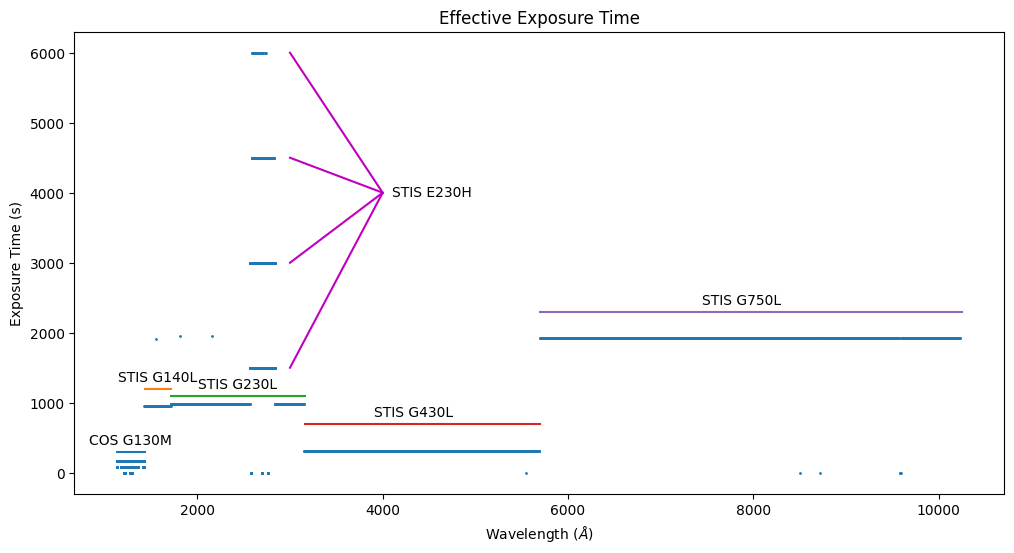

In [11]:
# Read the exposure-time array
exptime = hsla_data["EFF_EXPTIME"]

plt.figure(figsize=(12, 6))

# Plot the spectra
plt.scatter(hsla_wave, exptime, s=1)

# Which grating provided each part of the spectrum?
plt.plot([1130, 1435], [300, 300])
plt.plot([1435, 1716], [1200, 1200])
plt.plot([1716, 3159], [1100, 1100])
plt.plot([3159, 5700], [700, 700])
plt.plot([5700, 10252], [2300, 2300])
plt.text(1280, 400, 'COS G130M', horizontalalignment='center')
plt.text(1573, 1300, 'STIS G140L', horizontalalignment='center')
plt.text(2437, 1200, 'STIS G230L', horizontalalignment='center')
plt.text(4330, 800, 'STIS G430L', horizontalalignment='center')
plt.text(7876, 2400, 'STIS G750L', horizontalalignment='center')

plt.plot([3000, 4000], [6000, 4000], 'm')
plt.plot([3000, 4000], [4500, 4000], 'm')
plt.plot([3000, 4000], [3000, 4000], 'm')
plt.plot([3000, 4000], [1500, 4000], 'm')
plt.text(4100, 3950, 'STIS E230H')

# Format the plot by adding titles
plt.title("Effective Exposure Time")
plt.xlabel(r'Wavelength ($\AA$)')
plt.ylabel(r'Exposure Time (s)')
plt.show()

There is a bit of scatter in the exposure-time plot.  Wavelength bins with higher-than-average exposure time contain data from multiple input pixels.  Bins with lower-than-average time were observed at some central wavelengths (or FP-POS setting) but not others.  Bins with zero exposure time either were never observed or were excluded because of their DQ flags.  The STIS G230H is an echelle grating, and some wavelength bins contain data from multiple orders.

<a id = hsla_provenance></a>
### 1.4 Examine the Provenance Table

Extension 2 of the `aspec` file contains information about the individual exposures of which it is composed.

In [12]:
# Print the provenance table.

provenance.pprint_all()

     FILENAME       EXPNAME  PROPOSID TELESCOPE INSTRUMENT DETECTOR DISPERSER CENWAVE APERTURE LIFE_ADJ SPECRES        CAL_VER          MJD_BEG          MJD_MID          MJD_END     XPOSURE      MINWAVE            MAXWAVE      
                                                                                                                                           d                d                d           s         Angstrom           Angstrom     
------------------ --------- -------- --------- ---------- -------- --------- ------- -------- -------- -------- ------------------- -------------- ------------------ -------------- ------- ------------------ ------------------
lfac37doq_x1d.fits lfac37doq    17420       HST        COS      FUV     G130M    1291      PSA        5  18000.0               3.6.1 60546.56632895    60546.566826635 60546.56732432    86.0 1134.0928081335824 1429.5239115244303
lfac37dtq_x1d.fits lfac37dtq    17420       HST        COS      FUV     G130M    1291   

<a id = class></a>
## 2. Retrieve Targets by Class 

An important aspect of the HSLA project is the automated classification of all targets in the COS/STIS archive.  Based on information from SIMBAD, NED, and the Phase II proposal, HSLA’s target-classification scheme is structured as a three-tiered hierarchy.  For example, PKS 0405-123 is assigned a Tier 1 classification of Galaxy, Tier 2 of Active Galaxy, and Tier 3 of Seyfert Galaxy, while AzV 388 is classified as Star, Early-type star, and O Star.  We can take advantage of this work to retrieve the data for an entire class of objects, in this case all of the DA white dwarfs in the COS and STIS archives.

In [13]:
# Search for HSLA targets using the "TIER3 = DA white dwarf" part of the Target Classification.  
# Note that the wild cards are required.
    
datasets = Observations.query_criteria(project="HSLA", 
                                       target_classification=["*TIER3=DA white dwarf*"])
print(f"Found {len(datasets)} 'TIER3=DA white dwarf' HSLA datasets.")

Found 11 'TIER3=DA white dwarf' HSLA datasets.


In [14]:
# Get the products for these datasets.
products = Observations.get_unique_product_list(datasets)

In [15]:
# Filter to select only HSLA cspec and aspec FITS files.  
# If you want all of the HSLA files, omit the extension filters.
filtered = Observations.filter_products(products,
                                        extension=["cspec.fits", "aspec.fits"], 
                                        project="HSLA")

In [16]:
# Fetch the products
manifest = Observations.download_products(filtered, download_dir=str(output))

In [17]:
print(filtered['productFilename'])
print(len(filtered))

                        productFilename                        
---------------------------------------------------------------
                               hst_wd-1057p719--0721_aspec.fits
                hst_cos_wd-1057p719--0721_g160m-lp01_cspec.fits
                hst_cos_wd-1057p719--0721_g160m_lp01_cspec.fits
                  hst_wiseaj133741d51p363903d3--0759_aspec.fits
   hst_cos_wiseaj133741d51p363903d3--0759_g130m-lp01_cspec.fits
   hst_cos_wiseaj133741d51p363903d3--0759_g130m_lp01_cspec.fits
                  hst_wiseaj134117d90p342152d4--1395_aspec.fits
   hst_cos_wiseaj134117d90p342152d4--1395_g130m-lp03_cspec.fits
   hst_cos_wiseaj134117d90p342152d4--1395_g130m_lp03_cspec.fits
                  hst_wiseaj143714d63-223118d8--2339_aspec.fits
                                                            ...
     hst_cos_wdj123213d30-040925d74--3632_g130m_lp05_cspec.fits
               hst_galexascj080016d13p004046d3--3696_aspec.fits
hst_cos_galexascj080016d13p004046d3--369

In [18]:
# Let's have a look at the files retrieved for one of these stars.

!ls -1 hsla_default_products/mastDownload/HST/hst_hsla_wd1233-164--0735

ls: hsla_default_products/mastDownload/HST/hst_hsla_wd1233-164--0735: No such file or directory


<a id = customize></a>
## 3. HSLA Custom Co-Adds 

There are various ways to modify the abutted spectrum.  The co-add script operates on all of the files in a particular directory, so an easy way to modify the output is to change the contents of that directory.  An example is shown in the notebook, [Combining COS Data from Multiple Lifetime Positions and Central Wavelengths](https://spacetelescope.github.io/hst_notebooks/notebooks/HASP/COSLifetimePositions/COSLifetimePositions.html), in which we explicitly select the lifetime positions and central wavelengths to be considered.

We can also adjust the logic by which the abutting routine decides which co-added spectra to use for each wavelength region.  That logic is controlled by a file called `grating_priority.json`.  To change the mapping from grating to wavelength, we can simply edit the file.

Returning to the star Feige 22, we see in the plots above that the STIS G140L and G230L spectra overlap between about 1600 and 1700 A. We also see that the S/N ratio of the G230L spectrum is greater than that of the G140L spectrum. So we could improve the S/N ratio of the final spectrum in the overlap region by extending the wavelength range for which the G230L data are used.

Let's look more closely at the S/N ratios of the G140L and G230L spectra in the region of overlap.

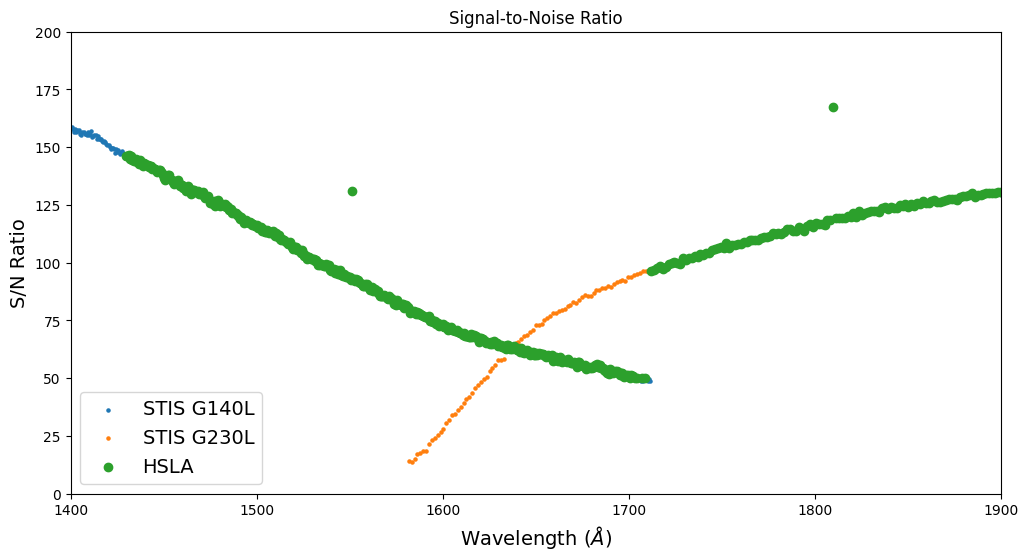

In [19]:
hdul = fits.open(f"{hsla_path}/hst_stis_feige22--3678_sg140l_cspec.fits")
sg140l_data = hdul[1].data
sg140l_wave = sg140l_data["WAVELENGTH"]
sg140l_snr = sg140l_data["SNR"]
hdul.close()

hdul = fits.open(f"{hsla_path}/hst_stis_feige22--3678_sg230l_cspec.fits")
sg230l_data = hdul[1].data
sg230l_wave = sg230l_data["WAVELENGTH"]
sg230l_snr = sg230l_data["SNR"]
hdul.close()

# Plot the spectra
g = np.where(hsla_snr > 50)        # Hide STIS E230H data
plt.figure(figsize=(12, 6))
plt.scatter(sg140l_wave, sg140l_snr, s=5, label='STIS G140L')
plt.scatter(sg230l_wave, sg230l_snr, s=5, label='STIS G230L')
plt.scatter(hsla_wave[g],  hsla_snr[g], label='HSLA')
plt.legend(fontsize=14)
plt.xlim([1400, 1900])
plt.ylim([0, 200])

# Format the plot by adding titles
plt.title("Signal-to-Noise Ratio")
plt.xlabel(r'Wavelength ($\AA$)', fontsize=14)
plt.ylabel(r'S/N Ratio', fontsize=14)
plt.show()

To use the G230L spectrum for wavelengths longer than 1640 A, we must edit the JSON file that controls the wavelength regions to which each grating contributes.  To retrieve the file, click on this link: https://github.com/spacetelescope/hasp/blob/main/hasp/grating_priority.json, then the "Download raw file" icon.  Copy the file into a new file called `my_grating_priority.json`.  Use your favorite text editor to replace 

```
"STIS/G140L": {
    "minwave": 1138.4,
    "maxwave": 1716.4,
    "priority": 14
},
```


with


```
"STIS/G140L": {
    "minwave": 1138.4,
    "maxwave": 1640.0,
    "priority": 14
},
```

<a id = retrieve_data></a>
### 3.1 Retrieve the COS and STIS Data

In [20]:
# Define data-download directory.
data_dir = Path("./data_dir/")

# Define the products directory to hold the output.
products_dir = Path("./hsla_products/")

# If the directories doesn't exist, then create them.
data_dir.mkdir(exist_ok=True)
products_dir.mkdir(exist_ok=True)

In [21]:
# Query MAST to get the product list
product_list = Observations.get_unique_product_list(
    Observations.query_criteria(
        instrument_name=['COS', 'STIS'],
        target_name=['WD0227+050', 'WDJ023016.63+051550.70'],
        dataproduct_type='SPECTRUM'
    )
)

# Download the x1d and sx1 files to the data directory.
Observations.download_products(
    product_list,
    download_dir=str(data_dir),
    productSubGroupDescription=['X1D', 'SX1']
)

Local Path,Status,Message,URL
str54,str8,object,object
data_dir/mastDownload/HST/ocd837010/ocd837010_x1d.fits,COMPLETE,None,None
data_dir/mastDownload/HST/oebo7b010/oebo7b010_x1d.fits,COMPLETE,None,None
data_dir/mastDownload/HST/oebo7b020/oebo7b020_x1d.fits,COMPLETE,None,None
data_dir/mastDownload/HST/oebo7b030/oebo7b030_sx1.fits,COMPLETE,None,None
data_dir/mastDownload/HST/oebo7b040/oebo7b040_sx1.fits,COMPLETE,None,None
data_dir/mastDownload/HST/lfac37dtq/lfac37dtq_x1d.fits,COMPLETE,None,None
data_dir/mastDownload/HST/lfac37doq/lfac37doq_x1d.fits,COMPLETE,None,None


Note: We had to search on two target names to get all of the data.  This obstacle can usually be overcome by searching on the target's coordinates.  Objects with high proper motion (or nearby binaries like Alpha Cen A/B) may require a bit more work. The HSLA metadata file should list all of the relevant program IDs, and the provenance extension of the cspec and aspec files contains a list of filenames that might be fed to astroquery.

When we download data using astroquery, it creates a directory called mastDownload/HST. Each dataset goes into a separate subfolder within that directory.  Before running the combination script, we must move all of the x1d files into a single directory. 

In [25]:
try:
    # The path to all obs_id folders
    mast_path = f"{data_dir}/mastDownload/HST/"

    # Check if mastDownload exists
    if not os.path.exists(mast_path):
        print(f"Directory {mast_path} doesn't exist.")

    # Getting a list of all obs_id folders. Each folder contains the FITS files
    obs_id_dirs = os.listdir(mast_path)

    # Iterating through sub-folders to change the path of each FITS file
    for obs_id in obs_id_dirs:
        # This is the path to each obs_id folder
        obs_id_path = os.path.join(mast_path, obs_id)

        # Getting list of FITS files in /mastDownload/HST/<obs_id> folder
        data_files = glob.glob(obs_id_path + "/*fits")

        # Iterating through each of these files to change their path individually
        for file in data_files:
            file_path = Path(file)
            new_path = data_dir / file_path.name
            shutil.move(file, new_path)

    # Now we can remove the mastDownload directory
    if os.path.exists(mast_path):
        shutil.rmtree(f"{data_dir}/mastDownload/")

except Exception as e:
    print(f"An error occurred: {e}")

Directory data_dir/mastDownload/HST/ doesn't exist.
An error occurred: [Errno 2] No such file or directory: 'data_dir/mastDownload/HST/'


<a id = run_script></a>
### 3.2 Run the Co-Add Script

Now we are ready to run the co-add script.  In a terminal window, execute the following command. 

`swrapper -i data_dir -o hsla_products -x -g ./my_grating_priority.json`

The -i parameter is the input directory (i.e, where the FITS files are located), while -o indicates the directory that will contain the newly created co-added products.  -x tells the program to create the cross-program products, and -g tells it to use our modified grating-priority file.

Make sure that you are using the stenv conda environment discussed at the beginning of the notebook.

Once that's done, we make the S/N plot using the new output files.

In [30]:
try:
    hdul = fits.open('hsla_products/hst_data-dir_aspec.fits')
    hsla_data = hdul[1].data
    hsla_wave = hsla_data["WAVELENGTH"]
    hsla_snr = hsla_data["SNR"]
    hdul.close()

    hdul = fits.open('hsla_products/hst_stis_data-dir_sg140l_cspec.fits')
    sg140l_data = hdul[1].data
    sg140l_wave = sg140l_data["WAVELENGTH"]
    sg140l_snr = sg140l_data["SNR"]
    hdul.close()

    hdul = fits.open('hsla_products/hst_stis_data-dir_sg230l_cspec.fits')
    g230l_data = hdul[1].data
    g230l_wave = g230l_data["WAVELENGTH"]
    g230l_snr = g230l_data["SNR"]
    hdul.close()

    # Plot the spectra
    g = np.where(hsla_snr > 50)        # Hide STIS E230H data
    plt.figure(figsize=(12, 6))
    plt.scatter(sg140l_wave, sg140l_snr, s=5, label='STIS G140L')
    plt.scatter(sg230l_wave, sg230l_snr, s=5, label='STIS G230L')
    plt.scatter(hsla_wave[g],  hsla_snr[g], label='HSLA')
    plt.legend(fontsize=14)
    plt.xlim([1400, 1900])
    plt.ylim([0, 200])

    # Format the plot by adding titles
    plt.title("Signal-to-Noise Ratio")
    plt.xlabel(r'Wavelength ($\AA$)', fontsize=14)
    plt.ylabel(r'S/N Ratio', fontsize=14)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}"+"\nPlease run the coadd script first")

An error occurred: [Errno 2] No such file or directory: 'hsla_products/hst_data-dir_aspec.fits'
Please run the coadd script first


In this example, we made a small change to the grating-priority table to improve the S/N over a 76 A region of the abutted spectrum, but you can imagine situations in which one might completely reorder the grating priorities.

<a id = scale_spectra></a>
## 4. Scaling Spectra for Special Cases

In the process of co-adding data, the HSLA script compares the flux of each spectrum for a given mode against an initial coadd that includes all of the input spectra. If the median flux of an input spectrum is deemed too low, it will be removed; the program iterates until no more spectra are rejected. This is to prevent data from failed observations from being combined with good data.

But there are cases in which one might want to include low-flux spectra.  Variable sources are but one example. STIS has multiple apertures, which for extended sources could create flux offsets between gratings. The smallest STIS apertures can be impacted by changes in observatory focus, creating flux offsets. Finally, extended sources observed at multiple orientations may have slight variations in flux. If a user’s science case is not dependent on a dataset’s absolute flux, scaling input spectra to be the same average flux may be desirable.

If you are interested in scaling your data, please see the notebook, [Scaling Flux while using the Hubble Advanced Spectral Products Script](https://spacetelescope.github.io/hst_notebooks/notebooks/HASP/FluxScaleTutorial/FluxScaleTutorial.html).

# Congrats on completing the notebook!

### There are more tutorial notebooks for custom co-addition cases in [this repo](https://spacetelescope.github.io/hst_notebooks/notebooks/COS/README.html).  Check them out!

## About this Notebook
**Author:** Van Dixon (dixon@stsci.edu)

**Updated on:** 10/01/2025

*This tutorial was generated to be in compliance with the [STScI style guides](https://github.com/spacetelescope/style-guides) and would like to cite the [Jupyter guide](https://github.com/spacetelescope/style-guides/blob/master/templates/example_notebook.ipynb) in particular.*

## Citations

If you use the following packages for published research, please cite the authors. Follow these links for more information about citations:

* [Citing `astropy`](https://docs.astropy.org/en/stable/index.html)

* [Citing `astroquery`](https://astroquery.readthedocs.io/en/latest/)

* [Citing `matplotlib`](https://matplotlib.org/stable/users/project/citing.html)

* [Citing `numpy`](https://numpy.org/citing-numpy/)

* [Citing `scipy`](https://scipy.org/citing-scipy/)
<hr>
<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/hst_notebooks/main/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/> 